In [7]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path = '/content/drive/My Drive/Img'

In [0]:
#first we import needed libiraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
import numpy as np
import os 
import glob2 as gb
import cv2
import scipy.optimize as opt
import sys
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
%matplotlib inline
np.random.seed(2)
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

#code characters    
code = {'0':0, '1':1, '2':2, '3':3, '4':4,
               '5':5, '6':6, '7':7, '8':8, '9':9,
               'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16,
               'H':17, 'I':18, 'J':19, 'K':20, 'L':21, 'M':22, 'N':23,
               'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30,
               'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35, 'As':36, 'Bs':37, 
               'Cs':38, 'Ds':39, 'Es':40, 'Fs':41, 'Gs':42, 'Hs':43, 'Is':44, 
               'Js':45, 'Ks':46, 'Ls':47, 'Ms':48, 'Ns':49, 'Os':50, 'Ps':51,
               'Qs':52, 'Rs':53, 'Ss':54, 'Ts':55, 'Us':56, 'Vs':57, 'Ws':58, 
               'Xs':59, 'Ys':60, 'Zs':61,}

In [23]:
#read dataset from specific file in your device
train_path = '/content/drive/My Drive/Img/'
dataset_path = train_path




#create X and Y
x=[]
y=[]

#upload data and resize it
for folder in os.listdir(dataset_path):
    files = gb.glob(pathname=str(dataset_path)+folder+'/*png')
    print(f'for dataset , found {len(files)} in folder {folder}')
    for file in files :
        image = cv2.imread(file)
        image_array = cv2.resize(image,(28,28))
        x.append(list(image_array))
        y.append(code[folder])

for dataset , found 55 in folder 1
for dataset , found 55 in folder 2
for dataset , found 55 in folder 9
for dataset , found 55 in folder 7
for dataset , found 55 in folder 8
for dataset , found 55 in folder 3
for dataset , found 55 in folder 6
for dataset , found 55 in folder 4
for dataset , found 55 in folder 5
for dataset , found 55 in folder 0
for dataset , found 55 in folder A
for dataset , found 55 in folder Es
for dataset , found 55 in folder As
for dataset , found 55 in folder Cs
for dataset , found 55 in folder Bs
for dataset , found 55 in folder E
for dataset , found 55 in folder C
for dataset , found 55 in folder B
for dataset , found 55 in folder D
for dataset , found 55 in folder Ds
for dataset , found 55 in folder H
for dataset , found 55 in folder F
for dataset , found 55 in folder Hs
for dataset , found 55 in folder G
for dataset , found 55 in folder I
for dataset , found 55 in folder Js
for dataset , found 55 in folder Gs
for dataset , found 55 in folder Is
for dataset

2


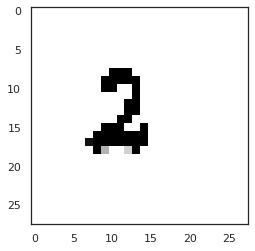

In [24]:
plt.imshow (x [55])
print (y [55])


In [25]:
size = []
for folder in os.listdir(dataset_path):
    files = gb.glob(pathname=str(dataset_path) + folder + '/*png')
    print(f'for dataset , found {len(files)} in folder {folder}')
    for file in files :
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

for dataset , found 55 in folder 1
for dataset , found 55 in folder 2
for dataset , found 55 in folder 9
for dataset , found 55 in folder 7
for dataset , found 55 in folder 8
for dataset , found 55 in folder 3
for dataset , found 55 in folder 6
for dataset , found 55 in folder 4
for dataset , found 55 in folder 5
for dataset , found 55 in folder 0
for dataset , found 55 in folder A
for dataset , found 55 in folder Es
for dataset , found 55 in folder As
for dataset , found 55 in folder Cs
for dataset , found 55 in folder Bs
for dataset , found 55 in folder E
for dataset , found 55 in folder C
for dataset , found 55 in folder B
for dataset , found 55 in folder D
for dataset , found 55 in folder Ds
for dataset , found 55 in folder H
for dataset , found 55 in folder F
for dataset , found 55 in folder Hs
for dataset , found 55 in folder G
for dataset , found 55 in folder I
for dataset , found 55 in folder Js
for dataset , found 55 in folder Gs
for dataset , found 55 in folder Is
for dataset

(900, 1200, 3)    3410
dtype: int64

(28, 28, 3)
sample x_train[0] : 
  [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


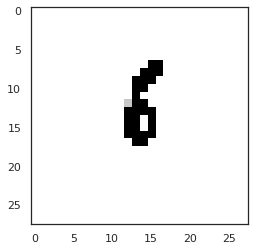

In [26]:
# Split the train and the validation set for the fitting
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.1,random_state = 2 )

x_train = np.asarray(x_train)
x_test  = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)



plt.imshow(x_train[1])
print(x_train[0].shape)
# print('shape of x_train :', x_train.shape())
#print('shape of x_train[5] : ', x_train[5].shape)
#print('any image contain : x_train[0] \n',x_train[0])
#print('x_train shape :' , x_train.shape)
#print('y_train shape :' , y_train.shape)

#print(type(y_train))

# next step should be normlize image 
x_train , x_test = x_train/255.0 , x_test/255.0
print('sample x_train[0] : \n ' ,x_train[0])

In [27]:
# in the same step convert ouput by using one hot encoding 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# function get code
def getcode(n):
    for x,y in code.items():
        if n ==y :
            return x



In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(62, activation = "softmax"))

In [0]:
#optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
#model compilation
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
epochs = 30 # more epoches = more accurace
batch_size = 30

In [33]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (x_test, y_test), verbose = 2)

Train on 3069 samples, validate on 341 samples
Epoch 1/30
 - 21s - loss: 4.1338 - accuracy: 0.0117 - val_loss: 4.1278 - val_accuracy: 0.0059
Epoch 2/30
 - 21s - loss: 3.8861 - accuracy: 0.0642 - val_loss: 3.3347 - val_accuracy: 0.1672
Epoch 3/30
 - 21s - loss: 3.1387 - accuracy: 0.1864 - val_loss: 2.4750 - val_accuracy: 0.3842
Epoch 4/30
 - 21s - loss: 2.4995 - accuracy: 0.3161 - val_loss: 2.1378 - val_accuracy: 0.4399
Epoch 5/30
 - 21s - loss: 2.0184 - accuracy: 0.4405 - val_loss: 1.5735 - val_accuracy: 0.5748
Epoch 6/30
 - 21s - loss: 1.6682 - accuracy: 0.5282 - val_loss: 1.3045 - val_accuracy: 0.6716
Epoch 7/30
 - 21s - loss: 1.4052 - accuracy: 0.5862 - val_loss: 1.2133 - val_accuracy: 0.6862
Epoch 8/30
 - 21s - loss: 1.2347 - accuracy: 0.6367 - val_loss: 1.1190 - val_accuracy: 0.7126
Epoch 9/30
 - 21s - loss: 1.1100 - accuracy: 0.6562 - val_loss: 1.0210 - val_accuracy: 0.7214
Epoch 10/30
 - 21s - loss: 0.9700 - accuracy: 0.6944 - val_loss: 1.0269 - val_accuracy: 0.7067
Epoch 11/30


In [37]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
results = confusion_matrix(y_test,y_pred)
print ('Confusion Matrix :')
print(results) 
sns.heatmap(results,center=True)
plt.show()
print ('Accuracy Score :',accuracy_score(y_test, y_pred.round(), normalize=False))
print ('Report : ')
print (classification_report(y_test, y_pred))

ValueError: ignored